In [13]:
# !pip install influxdb-client

In [14]:
import influxdb_client
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path

In [15]:
config_file = "/windows/os/Thesis-Project/ODAbler/key-configurations/influxdb-config.json"
p = Path(config_file)
with p.open('r') as f:
    content = json.load(f)
    print(content)
url = content['url']
token = content['token']
org = content['org']
client = influxdb_client.InfluxDBClient(
   url=url,
   token=token,
   org=org
)
query_api = client.query_api()

{'bucket': 'Temporary', 'org': '@Large-Research', 'token': 'd5KtoS1-I2iMVHiRQsVnXKV7MW7QR70Z1mqRdvqs08v-jKxEv8Q_URRHr2tl4AUwwqWHDeZNUKEtSTLjiCf-vg==', 'url': 'http://localhost:8086', 'location': 'Amsterdam'}


In [16]:
query_standard = 'from(bucket:"Experiment")\
|> range(start: 2023-09-18T22:20:00Z, stop: 2023-09-18T22:34:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policy_id|guestsRunning|cpuUtilisation|timestamp|powerUsage|powerTotal|host_id/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policy_id == 1)'
result_standard = query_api.query_data_frame(org=org, query=query_standard)

#display(result_standard.head(10))
pd.set_option('display.max_columns', None)
df_standard = result_standard[['timestamp','host_id','cpuUtilisation','guestsRunning','powerUsage','powerTotal']]
print(df_standard)

     timestamp  host_id  cpuUtilisation  guestsRunning  powerUsage   
0       1000.0      0.0        0.500000           12.0  218.750000  \
1       1000.0      1.0        0.541667           13.0  223.838976   
2       1000.0      2.0        0.416667           10.0  210.850694   
3       1000.0      3.0        0.416667           10.0  210.850694   
4       1000.0      4.0        0.291667            7.0  203.721788   
..         ...      ...             ...            ...         ...   
369    11000.0     29.0        0.041667            1.0  200.010851   
370    11000.0     30.0        0.041667            1.0  200.010851   
371    11000.0     31.0        0.041667            1.0  200.010851   
372    11000.0     32.0        0.000000            0.0  200.000000   
373    11000.0     33.0        0.041667            1.0  200.010851   

       powerTotal  
0    2.451133e+05  
1    4.904217e+05  
2    7.352067e+05  
3    9.788205e+05  
4    1.222501e+06  
..            ...  
369  8.491048e+07  

In [17]:
query_heft = 'from(bucket:"Experiment")\
|> range(start: 2023-09-18T22:20:00Z, stop: 2023-09-18T22:34:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policy_id|guestsRunning|cpuUtilisation|timestamp|powerUsage|powerTotal|host_id/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policy_id == 2)'
result_heft = query_api.query_data_frame(org=org, query=query_heft)

df_heft = result_heft[['timestamp','host_id','cpuUtilisation','guestsRunning','powerUsage','powerTotal']]
print(df_heft)

     timestamp  host_id  cpuUtilisation  guestsRunning  powerUsage   
0       1000.0      0.0        0.500000           12.0  218.750000  \
1       1000.0      1.0        0.541667           13.0  223.838976   
2       1000.0      2.0        0.416667           10.0  210.850694   
3       1000.0      3.0        0.416667           10.0  210.850694   
4       1000.0      4.0        0.291667            7.0  203.721788   
..         ...      ...             ...            ...         ...   
335    10000.0     29.0        0.041667            1.0  200.010851   
336    10000.0     30.0        0.083333            2.0  200.086806   
337    10000.0     31.0        0.041667            1.0  200.010851   
338    10000.0     32.0        0.041667            1.0  200.010851   
339    10000.0     33.0        0.041667            1.0  200.010851   

       powerTotal  
0    2.451133e+05  
1    4.904217e+05  
2    7.352067e+05  
3    9.788205e+05  
4    1.222501e+06  
..            ...  
335  7.793107e+07  

In [18]:
query_random = 'from(bucket:"Experiment")\
|> range(start: 2023-09-18T22:20:00Z, stop: 2023-09-18T22:34:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policy_id|guestsRunning|cpuUtilisation|timestamp|powerUsage|powerTotal|host_id/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policy_id == 3)'
result_random = query_api.query_data_frame(org=org, query=query_random)

df_random = result_random[['timestamp','host_id','cpuUtilisation','guestsRunning','powerUsage','powerTotal']]
print(df_random)

     timestamp  host_id  cpuUtilisation  guestsRunning  powerUsage   
0       1000.0      0.0        0.083333            2.0  200.086806  \
1       1000.0      1.0        0.083333            2.0  200.086806   
2       1000.0      2.0        0.083333            2.0  200.086806   
3       1000.0      3.0        0.083333            2.0  200.086806   
4       1000.0      4.0        0.083333            2.0  200.086806   
..         ...      ...             ...            ...         ...   
505    15000.0     29.0        0.958333           23.0  332.020399   
506    15000.0     30.0        1.000000           24.0  350.000000   
507    15000.0     31.0        0.958333           23.0  332.020399   
508    15000.0     32.0        0.958333           23.0  332.020399   
509    15000.0     33.0        1.000000           24.0  350.000000   

       powerTotal  
0    2.094128e+05  
1    4.195784e+05  
2    6.297628e+05  
3    8.426643e+05  
4    1.052307e+06  
..            ...  
505  1.100548e+08  

In [19]:
query_minmin = 'from(bucket:"Experiment")\
|> range(start: 2023-09-18T22:20:00Z, stop: 2023-09-18T22:34:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policy_id|guestsRunning|cpuUtilisation|timestamp|powerUsage|powerTotal|host_id/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policy_id == 4)'
result_minmin = query_api.query_data_frame(org=org, query=query_minmin)

df_minmin = result_minmin[['timestamp','host_id','cpuUtilisation','guestsRunning','powerUsage','powerTotal']]
print(df_minmin)

     timestamp  host_id  cpuUtilisation  guestsRunning  powerUsage   
0       1000.0      0.0        0.500000           12.0  218.750000  \
1       1000.0      1.0        0.541667           13.0  223.838976   
2       1000.0      2.0        0.416667           10.0  210.850694   
3       1000.0      3.0        0.416667           10.0  210.850694   
4       1000.0      4.0        0.291667            7.0  203.721788   
..         ...      ...             ...            ...         ...   
335    10000.0     29.0        0.041667            1.0  200.010851   
336    10000.0     30.0        0.083333            2.0  200.086806   
337    10000.0     31.0        0.041667            1.0  200.010851   
338    10000.0     32.0        0.041667            1.0  200.010851   
339    10000.0     33.0        0.041667            1.0  200.010851   

       powerTotal  
0    2.451133e+05  
1    4.904217e+05  
2    7.352067e+05  
3    9.788205e+05  
4    1.222501e+06  
..            ...  
335  7.793107e+07  

In [20]:
df_total_power_standard = df_standard[['timestamp','host_id','powerTotal']]
df_total_power_standard['host_id'] = df_total_power_standard['host_id']. astype(int)
df_total_power_standard = df_total_power_standard.loc[df_total_power_standard['host_id'] == 33]
print(df_total_power_standard)

     timestamp  host_id    powerTotal
33      1000.0       33  8.309371e+06
67      2000.0       33  1.610046e+07
101     3000.0       33  2.417643e+07
135     4000.0       33  3.172351e+07
169     5000.0       33  4.018811e+07
203     6000.0       33  4.791615e+07
237     7000.0       33  5.581547e+07
271     8000.0       33  6.394212e+07
305     9000.0       33  7.184868e+07
339    10000.0       33  7.865005e+07
373    11000.0       33  8.574522e+07


/tmp/ipykernel_16173/2689543323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_standard['host_id'] = df_total_power_standard['host_id']. astype(int)


In [21]:
df_total_power_heft = df_heft[['timestamp','host_id','powerTotal']]
df_total_power_heft['host_id'] = df_total_power_heft['host_id']. astype(int)
df_total_power_heft = df_total_power_heft.loc[df_total_power_heft['host_id'] == 33]
print(df_total_power_heft)

     timestamp  host_id    powerTotal
33      1000.0       33  8.309371e+06
67      2000.0       33  1.610046e+07
101     3000.0       33  2.417643e+07
135     4000.0       33  3.172351e+07
169     5000.0       33  4.018811e+07
203     6000.0       33  4.791615e+07
237     7000.0       33  5.581262e+07
271     8000.0       33  6.367144e+07
305     9000.0       33  7.175391e+07
339    10000.0       33  7.875559e+07


/tmp/ipykernel_16173/149652282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_heft['host_id'] = df_total_power_heft['host_id']. astype(int)


In [22]:
df_total_power_random = df_random[['timestamp','host_id','powerTotal']]
df_total_power_random['host_id'] = df_total_power_random['host_id']. astype(int)
df_total_power_random = df_total_power_random.loc[df_total_power_random['host_id'] == 33]
print(df_total_power_random)

     timestamp  host_id    powerTotal
33      1000.0       33  7.149678e+06
67      2000.0       33  1.428731e+07
101     3000.0       33  2.142049e+07
135     4000.0       33  2.823651e+07
169     5000.0       33  3.593509e+07
203     6000.0       33  4.346044e+07
237     7000.0       33  5.088945e+07
271     8000.0       33  5.859287e+07
305     9000.0       33  6.603466e+07
339    10000.0       33  7.379242e+07
373    11000.0       33  8.145278e+07
407    12000.0       33  8.911018e+07
441    13000.0       33  9.672417e+07
475    14000.0       33  1.037710e+08
509    15000.0       33  1.108955e+08


/tmp/ipykernel_16173/1306925247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_random['host_id'] = df_total_power_random['host_id']. astype(int)


In [23]:
# df_total_power_minmin = df_minmin[['timestamp','host_id','powerTotal']]
# df_total_power_minmin['host_id'] = df_total_power_minmin['host_id']. astype(int)
# df_total_power_minmin = df_total_power_minmin.loc[df_total_power_minmin['host_id'] == 33]
# print(df_total_power_minmin)

Text(0.5, 0, 'Timestamp (in s: seconds)')

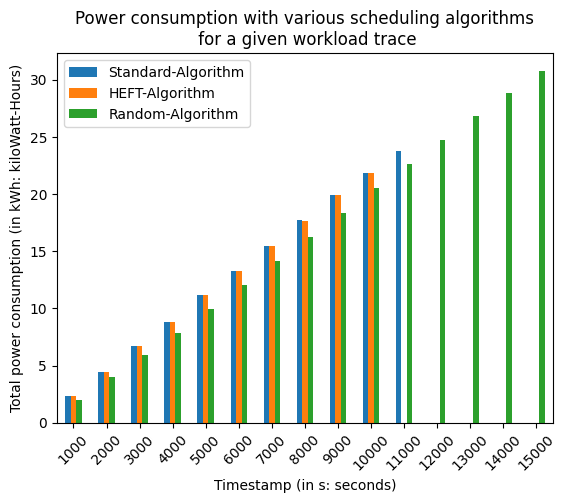

In [29]:
df1 = df_total_power_standard.drop(['host_id'], axis=1)
df2 = df_total_power_heft.drop(['host_id'], axis=1)
df3 = df_total_power_random.drop(['host_id'], axis=1)
# df4 = df_total_power_minmin.drop(['host_id'], axis=1)
# print(df1)
# Create a list of all the dataframes
dfs = [df1, df2, df3]

# Create a new dataframe with all the timestamps from all the dataframes
df_timestamps = pd.DataFrame({'timestamp': sorted(set(sum([df['timestamp'].tolist() for df in dfs], [])))})

# Merge the new dataframe with all the dataframes, filling in missing values with 0
df_merged = df_timestamps.merge(df1, how='left', on='timestamp', suffixes=('', '_x')).merge(df2, how='left', on='timestamp', suffixes=('', '_y')).merge(df3, how='left', on='timestamp', suffixes=('', '_z')).fillna(0)

# Convert watts to kiloWatt-hours
df_merged["powerTotal"] = df_merged["powerTotal"]/(1000*3600)
df_merged["powerTotal_y"] = df_merged["powerTotal_y"]/(1000*3600)
df_merged["powerTotal_z"] = df_merged["powerTotal_z"]/(1000*3600)
# df_merged["powerTotal_w"] = df_merged["powerTotal_w"]/1000000
df_merged.rename(columns={'powerTotal': 'Standard-Algorithm', 'powerTotal_y': 'HEFT-Algorithm', 'powerTotal_z': 'Random-Algorithm'}, inplace=True) #, 'powerTotal_w': 'MinMin-Algorithm'
df_merged['timestamp'] = df_merged['timestamp'].astype(int)
# Create a bar plot of the merged dataframe, grouped by timestamp
# df_merged.groupby('timestamp').plot(x='timestamp', y=['powerTotal', 'powerTotal_y', 'powerTotal_z', 'powerTotal_w'], kind='bar', bar_label=True)
# plt.figure(figsize=(10, 6))
# # df_merged.plot(x='timestamp', y=['powerTotal', 'powerTotal_y', 'powerTotal_z', 'powerTotal_w'], kind='bar', stacked=True)
# plt.xlabel('Timestamp')
# plt.ylabel('Value')
# plt.title('Bar plot of 4 dataframes with different row counts')
# plt.xticks(rotation=45)
# plt.legend(title='Dataframes')
# plt.tight_layout()
# plt.show()
fig, ax = plt.subplots()
df_merged.plot.bar(x='timestamp', ax=ax, title='Power consumption with various scheduling algorithms\n for a given workload trace')
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('Total power consumption (in kWh: kiloWatt-Hours)')
plt.xlabel('Timestamp (in s: seconds)')

In [30]:
# df_merged["powerTotal"] = df_merged["powerTotal"]/(1000*3600)
# df_merged["powerTotal_y"] = df_merged["powerTotal_y"]/(1000*3600)
# df_merged["powerTotal_z"] = df_merged["powerTotal_z"]/(1000*3600)
print(df_merged)

    timestamp  Standard-Algorithm  HEFT-Algorithm  Random-Algorithm
0        1000            2.308159        2.308159          1.986022
1        2000            4.472349        4.472349          3.968699
2        3000            6.715674        6.715674          5.950135
3        4000            8.812087        8.812087          7.843476
4        5000           11.163364       11.163364          9.981969
5        6000           13.310040       13.310040         12.072345
6        7000           15.504296       15.503505         14.135957
7        8000           17.761699       17.686512         16.275796
8        9000           19.957966       19.931640         18.342962
9       10000           21.847236       21.876552         20.497895
10      11000           23.818116        0.000000         22.625771
11      12000            0.000000        0.000000         24.752827
12      13000            0.000000        0.000000         26.867825
13      14000            0.000000        0.00000

In [32]:
# Reverse the column and find the first non-zero value for getting total power
last_non_zero_value_standard = df_merged[df_merged['Standard-Algorithm'] != 0]['Standard-Algorithm'].iloc[-1]
print(f"Total energy consumption in FIFO algorithm for executing given trace - {last_non_zero_value_standard}kWh")
last_non_zero_value_heft = df_merged[df_merged['HEFT-Algorithm'] != 0]['HEFT-Algorithm'].iloc[-1]
print(f"Total energy consumption in HEFT algorithm for executing given trace - {last_non_zero_value_heft}kWh")
last_non_zero_value_random = df_merged[df_merged['Random-Algorithm'] != 0]['Random-Algorithm'].iloc[-1]
print(f"Total energy consumption in Random algorithm for executing given trace - {last_non_zero_value_random}kWh")

Total energy consumption in FIFO algorithm for executing given trace - 23.81811610617527kWh
Total energy consumption in HEFT algorithm for executing given trace - 21.87655216510753kWh
Total energy consumption in Random algorithm for executing given trace - 30.804316938558394kWh


In [33]:
total_energy_for_all_scheduling_algos = [last_non_zero_value_standard, last_non_zero_value_heft, last_non_zero_value_random]
print(total_energy_for_all_scheduling_algos)

[23.81811610617527, 21.87655216510753, 30.804316938558394]


In [45]:
min_value = min(total_energy_for_all_scheduling_algos)
dict = {0:"FIFO", 1:"HEFT", 2:"Random"}
min_index = total_energy_for_all_scheduling_algos.index(min_value)

# Calculate the percentage difference for each element compared to the minimum
percentages = []
for i, value in enumerate(total_energy_for_all_scheduling_algos):
    if i == min_index:
        continue  # Skip comparing the minimum value to itself
    percentage_difference = ((value - min_value) / min_value) * 100
    percentages.append((i, percentage_difference))

# Print the results
print(f"Resource scheduling algorithm {dict[min_index]} is the most optimal amongst the three scheduling algorithms analysed above!")
print("----------------------------------------------------------------------------------------------------------------------------------------------")
for i, percentage in percentages:
    print(f"Scheduling algorithm {dict[i]} records {abs(percentage):.0f}% {'better' if percentage < 0 else 'worse'} energy-efficiency than the scheduling algorithm {dict[min_index]} for the given workload trace and cluster configuration.")


Resource scheduling algorithm HEFT is the most optimal amongst the three scheduling algorithms analysed above!
----------------------------------------------------------------------------------------------------------------------------------------------
Scheduling algorithm FIFO records 9% worse energy-efficiency than the scheduling algorithm HEFT for the given workload trace and cluster configuration.
Scheduling algorithm Random records 41% worse energy-efficiency than the scheduling algorithm HEFT for the given workload trace and cluster configuration.
